# Gecko dataset modelling

In [2]:
# Import required packages
from pathlib import Path

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split

In [3]:
# Load data and split into features and labels
data_path = Path("data/gecko_ml.csv")
data = pd.read_csv(data_path)

y = data["pSat_Pa"]
y_trans = data["trans_pSat_Pa"]

# Select the original data
x_original = data[['id', 'MW', 'NumOfAtoms', 'NumOfC', 'NumOfO', 'NumOfN',
       'NumHBondDonors', 'NumOfConf', 'NumOfConfUsed', 'cc', 'ccco',
       'hydroxyl_alkl', 'aldehyde', 'ketone', 'carboxylic_acid', 'ester',
       'ether_alicyclic', 'nitrate', 'nitro', 'aromatic_hydroxyl',
       'carbonylperoxynitrate', 'peroxide', 'hydroperoxide',
       'carbonylperoxyacid', 'nitroester', 'parentspecies']]

# Select data that has been preprocessed
x = data[['id', 'NumOfAtoms', 'NumOfC', 'NumOfO', 'NumOfN',
       'NumHBondDonors', 'NumOfConfUsed', 'cc', 'ccco',
       'hydroxyl_alkl', 'aldehyde', 'ketone', 'carboxylic_acid', 'ester',
       'ether_alicyclic', 'nitrate', 'nitro', 'aromatic_hydroxyl',
       'carbonylperoxynitrate', 'peroxide', 'hydroperoxide',
       'carbonylperoxyacid', 'nitroester', 'trans_NumOfConf',
       'trans_MW',
       'ohe_parentspecies_apin', 'ohe_parentspecies_apin_decane',
       'ohe_parentspecies_apin_decane_toluene',
       'ohe_parentspecies_apin_toluene', 'ohe_parentspecies_decane',
       'ohe_parentspecies_decane_toluene']]

# Select new variables that were created during preprocessing
x_new = data[['new_MW_hydroxyl_alkl_interaction',
       'new_polarity_score', 'new_num_pca_1', 'new_num_pca_2']]


In [5]:
preprocessed_data = data[['id', 'NumOfAtoms', 'NumOfC', 'NumOfO', 'NumOfN',
       'NumHBondDonors', 'NumOfConfUsed', 'cc', 'ccco',
       'hydroxyl_alkl', 'aldehyde', 'ketone', 'carboxylic_acid', 'ester',
       'ether_alicyclic', 'nitrate', 'nitro', 'aromatic_hydroxyl',
       'carbonylperoxynitrate', 'peroxide', 'hydroperoxide',
       'carbonylperoxyacid', 'nitroester', 'trans_NumOfConf',
       'trans_MW',
       'ohe_parentspecies_apin', 'ohe_parentspecies_apin_decane',
       'ohe_parentspecies_apin_decane_toluene',
       'ohe_parentspecies_apin_toluene', 'ohe_parentspecies_decane',
       'ohe_parentspecies_decane_toluene', 'pSat_Pa', 'trans_pSat_Pa']]

# One hot encoding of parentspecies column has Nan values, I decided to keep the rows with Nans and set each of the ohe* variables to one 
preprocessed_data[preprocessed_data[["ohe_parentspecies_apin",
"ohe_parentspecies_apin_decane",
"ohe_parentspecies_apin_decane_toluene",
"ohe_parentspecies_apin_toluene",
"ohe_parentspecies_decane",
"ohe_parentspecies_decane_toluene"]].isna()] = 1.0

# Based on the description below, I drop the id column
preprocessed_data = preprocessed_data.drop("id", axis=1)

train, val = train_test_split(preprocessed_data, test_size=0.3)

y_train = train["trans_pSat_Pa"]
y_train_org = train["pSat_Pa"]
x_train = train.drop(["trans_pSat_Pa", "pSat_Pa"], axis=1)

y_val = val["trans_pSat_Pa"]
y_val_org = val["pSat_Pa"]
x_val = val.drop(["trans_pSat_Pa", "pSat_Pa"], axis=1)

/tmp/ipykernel_23743/3748615811.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  preprocessed_data[preprocessed_data[["ohe_parentspecies_apin",
/tmp/ipykernel_23743/3748615811.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  preprocessed_data[preprocessed_data[["ohe_parentspecies_apin",


    
### Dataset columns descriptions

##### Original variables that were scaled:
- **id** - A unique molecule index used in naming files

- **pSat_Pa** - The saturation vapour pressure of the molecule calculated by COSMOtherm (Pa)
- **MW** - The molecular weight of the molecule (g/mol).
- **NumOfAtoms** - The number of atoms in the molecule
- **NumOfC** - The number of carbon atoms in the molecule
- **NumOfO** - The number of oxygen atoms in the molecul
- **NumOfN** - The number of nitrogen atoms in the molecule
- **NumHBondDonors** - “The number of hydrogen bond donors in the molecule, i.e. hydrogens bound to oxygen.”
- **NumOfConf** - The number of stable conformers found and successfully calculated by COSMOconf.
- **NumOfConfUsed** - The number of conformers used to calculate the thermodynamic properties.

- **cc** - The number of non-aromatic C=C bounds found in the molecule.
- **ccco** - The number of “C=C-C=O” structures found in non-aromatic rings in the molecule.
- **hydroxyl_alkl** - The number of the alkylic hydroxyl groups found in the molecule.
- **aldehyde** - The number of aldehyde groups in the molecule.
- **ketone** - The number of ketone groups in the molecule.

- **carboxylic_acid** - The number of carboxylic acid groups in the molecule.
- **ester** - The number of ester groups in the molecule.
- **ether_alicyclic** - The number of alicyclic ester groups in the molecule.
- **nitrate** - The number of alicyclic nitrate groups in the molecule
- **nitro** - The number of nitro ester groups in the molecule
- **aromatic_hydroxyl** - The number of alicyclic aromatic hydroxyl groups in the molecule.
- **carbonylperoxynitrate** - The number of carbonylperoxynitrate groups in the molecule.
- **peroxide** - The number of peroxide groups in the molecule
- **hydroperoxide** - The number of hydroperoxide groups in the molecule.
- **carbonylperoxyacid** - The number of carbonylperoxyacid groups found in the molecule
- **nitroester** - The number of nitroester groups found in the molecule
- **parentspecies** - Either “decane”, “toluene”, “apin” for alpha-pinene or a combination of these connected by an underscore to indicate ambiguous descent. In 243 cases, the parent species is “None” because it was not possible to retrieve it.
    

##### Transformed or created variables (also scaled):
                
- **trans_NumOfConf**,    # NumOfConf to the power of 0.3           
- **trans_MW**,           # Square root of trans_MW              
- **trans_pSat_Pa**,      # log transformed pSat_Pa                  
- **new_MW_hydroxyl_alkl_interaction**, #interaction term between MW and hydroxyl_alkl
- **new_polarity_score**,  #polarity with assigning different weights to functional group features               
- **new_num_pca_1**,      #First principal component for all variable with "Num" in names               
- **new_num_pca_2**,      #Second principal component for all variable with "Num" in names                  

#### Variables for the one hot encoding for parentspecies:
- **ohe_parentspecies_apin**,               # parentspecies category apin
- **ohe_parentspecies_apin_decane**,        # parentspecies category decane
- **ohe_parentspecies_apin_decane_toluene**,# parentspecies category apin_decane_toluene
- **ohe_parentspecies_apin_toluene**,       # parentspecies category apin_toluene
- **ohe_parentspecies_decane**,             # parentspecies category decane
- **ohe_parentspecies_decane_toluene**,     # parentspecies category decane_toluene

In [10]:
# Based on the description below, I drop the id column
x = x.drop("id", axis=1)

In [40]:
# One hot encoding of parentspecies column has Nan values, I decided to keep the rows with Nans and set each of the ohe* variables to one 
x[x[["ohe_parentspecies_apin",
"ohe_parentspecies_apin_decane",
"ohe_parentspecies_apin_decane_toluene",
"ohe_parentspecies_apin_toluene",
"ohe_parentspecies_decane",
"ohe_parentspecies_decane_toluene"]].isna()] = 1.0
x.isna().sum()

NumOfAtoms                               0
NumOfC                                   0
NumOfO                                   0
NumOfN                                   0
NumHBondDonors                           0
NumOfConfUsed                            0
cc                                       0
ccco                                     0
hydroxyl_alkl                            0
aldehyde                                 0
ketone                                   0
carboxylic_acid                          0
ester                                    0
ether_alicyclic                          0
nitrate                                  0
nitro                                    0
aromatic_hydroxyl                        0
carbonylperoxynitrate                    0
peroxide                                 0
hydroperoxide                            0
carbonylperoxyacid                       0
nitroester                               0
trans_NumOfConf                          0
trans_MW   

# Model selection


In [42]:
baseline = LinearRegression() # linear regression is a good candidate for the baseline model

scores = cross_val_score(baseline, x, y_trans, cv=10)
print(scores.mean())

0.6802828823796545


In [45]:
model1 = RandomForestRegressor()

scores = cross_val_score(model1, x_train, y_train, cv=10, scoring='r2')
print(scores.mean())

-156.917726605793


In [56]:
model2 = SVR()
scores = cross_val_score(model2, x_train, y_train, cv=10, scoring='r2')
print(scores.mean())

0.7515480602793303


In [6]:
model3 = GradientBoostingRegressor()
scores = cross_val_score(model3, x_train, y_train, cv=10, scoring='r2')
print(scores.mean())


0.7223356550468599


In [7]:
model3.fit(x_train, y_train)
predictions = model3.predict(x_val)


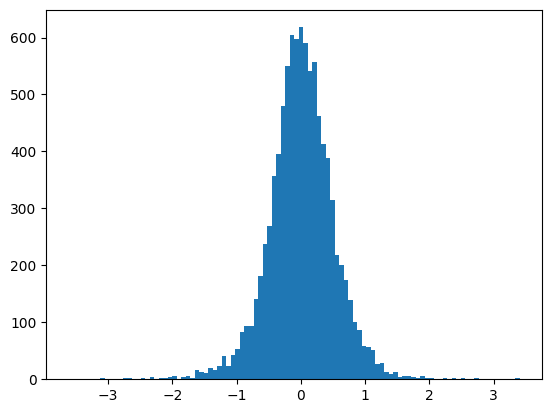

In [61]:

plt.hist(predictions - y_val, bins=100)
plt.show()

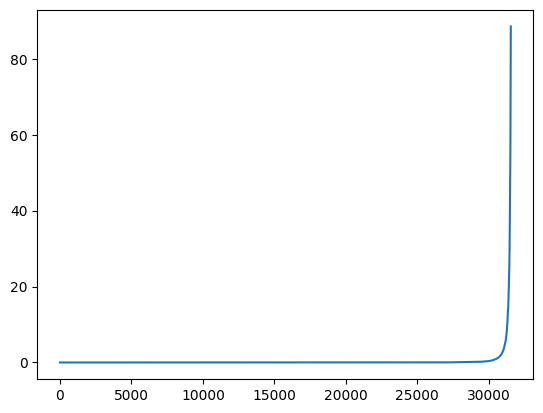

-0.0082843262048193 -0.0089709226682509 2.4525843076877867


In [34]:
org_pred = np.exp(predictions)

# plt.hist(y_val_org, bins=100)
to_plot = np.sort(df["pSat_Pa"])[:-100]
plt.plot(np.arange(to_plot.size), to_plot)
plt.show()
print(np.mean(y_val_org), y_val_org.min(), y_val_org.max()) 

In [11]:
df = pd.read_csv("data/Dataframe.csv")
test = pd.read_csv("data/test.csv")
traindata = pd.read_csv("data/train.csv")


In [35]:
df[df['index'] > 1000000]
orig_mean = df["pSat_Pa"].mean()
orig_std = df["pSat_Pa"].std()
orig_log_mean = np.log(df["pSat_Pa"]).mean()
orig_log_std = np.log(df["pSat_Pa"]).std()

In [42]:
print(orig_mean, orig_std)
y_val_org.describe()

49.26361939469571 5491.477433981779


count    9492.000000
mean       -0.008284
std         0.030769
min        -0.008971
25%        -0.008971
50%        -0.008971
75%        -0.008970
max         2.452584
Name: pSat_Pa, dtype: float64

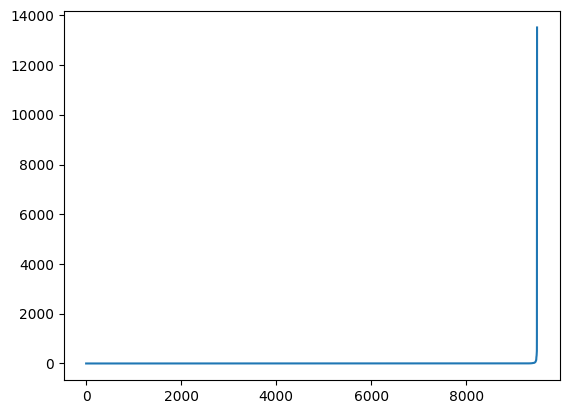

In [40]:
unsc_pred = orig_log_std * predictions + orig_log_mean
orig_pred = np.exp(unsc_pred)

to_plot = np.sort(orig_std * y_val_org + orig_mean)
plt.plot(np.arange(to_plot.size), to_plot)
plt.show()